In [1]:
import pandas as pd

df=pd.read_csv('./data/fraud.csv', index_col = 0)
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.40,
                                    random_state=1)

In [3]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 13015
Test set size: 8678


In [4]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train_scaled, y_train)
y_pred_mnb = mnb.predict(X_test_scaled)

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [7]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=1.0)
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
print("GAUSSIAN NB Performance:")
print(classification_report(y_test, y_pred_gnb, target_names=['Not Fraud', 'Fraud'], zero_division=0))
print("MULTINOMIAL NB Performance:")
print(classification_report(y_test, y_pred_mnb, target_names=['Not Fraud', 'Fraud'], zero_division=0))
print("BERNOULLI NB Performance:")
print(classification_report(y_test, y_pred_bnb, target_names=['Not Fraud', 'Fraud'], zero_division=0))

GAUSSIAN NB Performance:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99      8541
       Fraud       0.38      0.86      0.53       137

    accuracy                           0.98      8678
   macro avg       0.69      0.92      0.76      8678
weighted avg       0.99      0.98      0.98      8678

MULTINOMIAL NB Performance:
              precision    recall  f1-score   support

   Not Fraud       0.98      1.00      0.99      8541
       Fraud       0.00      0.00      0.00       137

    accuracy                           0.98      8678
   macro avg       0.49      0.50      0.50      8678
weighted avg       0.97      0.98      0.98      8678

BERNOULLI NB Performance:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      8541
       Fraud       0.93      0.76      0.84       137

    accuracy                           1.00      8678
   macro avg       0.96      0.88      0.92      

In [10]:
# COMPREHENSIVE ANALYSIS AND COMPARISON
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate comprehensive metrics for all models
def calculate_metrics(y_true, y_pred, model_name):
    """Calculate and return comprehensive metrics for a model"""
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0)
    }
    return metrics

# Calculate metrics for all models
results = []
results.append(calculate_metrics(y_test, y_pred_gnb, 'GaussianNB'))
results.append(calculate_metrics(y_test, y_pred_bnb, 'BernoulliNB'))
results.append(calculate_metrics(y_test, y_pred_mnb, 'MultinomialNB'))

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
print("=== NAIVE BAYES MODELS COMPARISON ===")
print(comparison_df.round(4))


=== NAIVE BAYES MODELS COMPARISON ===
           Model  Accuracy  Precision  Recall  F1-Score
0     GaussianNB    0.9757     0.3806  0.8613    0.5280
1    BernoulliNB    0.9953     0.9286  0.7591    0.8353
2  MultinomialNB    0.9842     0.0000  0.0000    0.0000


In [11]:
# Detailed confusion matrices for each model
models = [
    ('GaussianNB', y_pred_gnb),
    ('BernoulliNB', y_pred_bnb), 
    ('MultinomialNB', y_pred_mnb)
]

print("=== DETAILED CONFUSION MATRICES ===")
for model_name, predictions in models:
    print(f"\n{model_name} Confusion Matrix:")
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    print(f"True Negatives: {cm[0,0]}, False Positives: {cm[0,1]}")
    print(f"False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}")
    print("-" * 40)


=== DETAILED CONFUSION MATRICES ===

GaussianNB Confusion Matrix:
[[8349  192]
 [  19  118]]
True Negatives: 8349, False Positives: 192
False Negatives: 19, True Positives: 118
----------------------------------------

BernoulliNB Confusion Matrix:
[[8533    8]
 [  33  104]]
True Negatives: 8533, False Positives: 8
False Negatives: 33, True Positives: 104
----------------------------------------

MultinomialNB Confusion Matrix:
[[8541    0]
 [ 137    0]]
True Negatives: 8541, False Positives: 0
False Negatives: 137, True Positives: 0
----------------------------------------


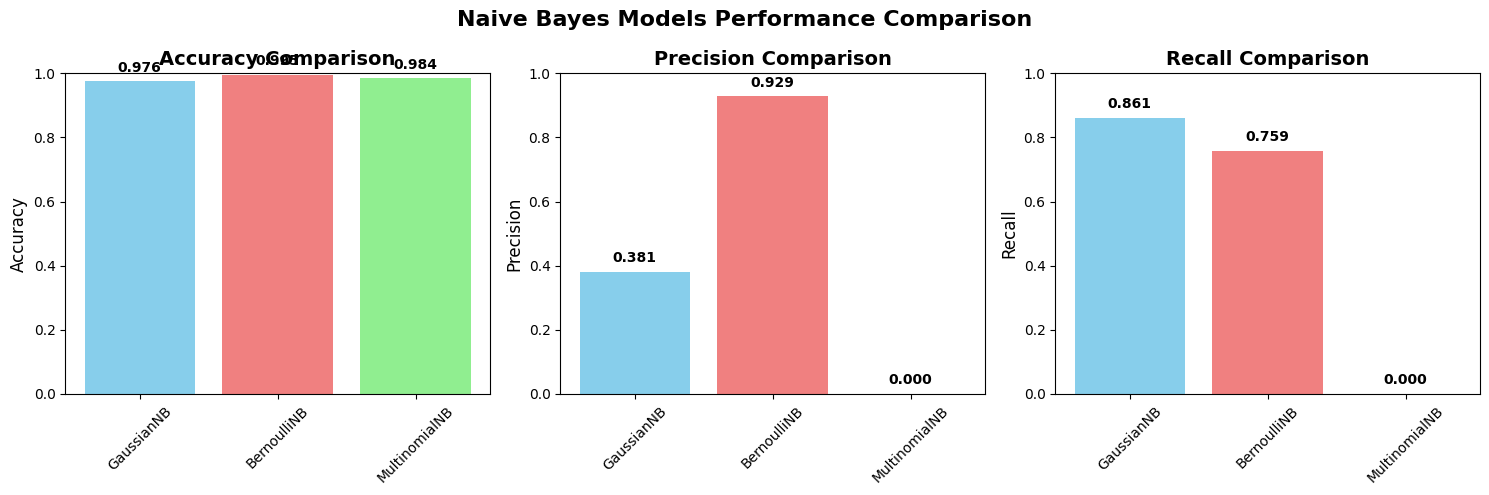

In [12]:
# VISUALIZATION: Model Performance Comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['Accuracy', 'Precision', 'Recall']
models = comparison_df['Model'].values
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, metric in enumerate(metrics):
    values = comparison_df[metric].values
    bars = axes[i].bar(models, values, color=colors)
    axes[i].set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                    f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Naive Bayes Models Performance Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()